In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Covide19India.csv')
data

C:\Users\Rahul Ozil Shah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499503,25491,3.0,08/01/2021,NaN,NaN,NaN,Saraikela-Kharsawan,Jharkhand,Hospitalized,8.0,1.0,2021.0
499504,25492,2.0,08/01/2021,NaN,NaN,NaN,Saraikela-Kharsawan,Jharkhand,Recovered,8.0,1.0,2021.0
499505,25493,1.0,08/01/2021,NaN,NaN,NaN,Leh,Ladakh,Hospitalized,8.0,1.0,2021.0
499506,25494,11.0,08/01/2021,NaN,NaN,NaN,Leh,Ladakh,Recovered,8.0,1.0,2021.0


In [3]:
  Day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
Day

Month  Day 
1.0    1.0     20159.0
       2.0     18144.0
       3.0     16678.0
       4.0     16278.0
       5.0     17909.0
                ...   
12.0   27.0    20333.0
       28.0    16072.0
       29.0    20542.0
       30.0    21945.0
       31.0    19026.0
Name: Num Cases, Length: 309, dtype: float64

In [4]:
x=np.arange(len(Day))
x=x.reshape(-1,1)
y=Day.values

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=400)
reg.fit(x,y)

RandomForestRegressor(n_estimators=400)

In [12]:
reg.score(x,y)*100

99.80503566305424

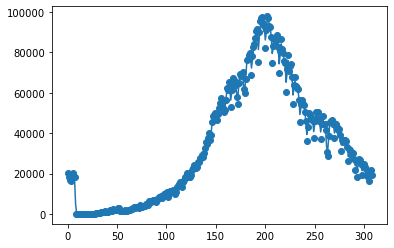

In [14]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x))
plt.show()

In [17]:
reg.predict([[352]])

array([19813.8125])